In [ ]:
!pip install imageio

Saving meme-antony-6_169.png to meme-antony-6_169 (3).png


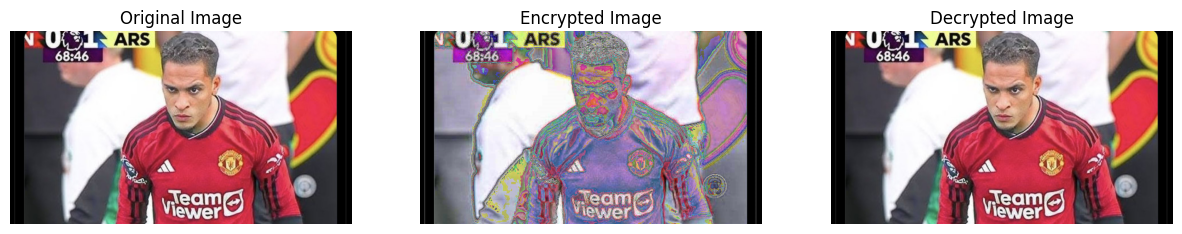

In [ ]:
import imageio.v3 as io
import numpy as np
import matplotlib.pyplot as plt

def is_one(matrix):
    """
    Fungsi untuk mengecek apakah determinan dari matrix adalah 1
    """
    a = matrix[0][0]
    b = matrix[0][1]
    c = matrix[1][0]
    d = matrix[1][1]
    return (a * d) - (b * c) == 1

def invert_matrix(matrix):
    """
    Fungsi untuk menghitung invers dari matriks 2x2
    """
    a, b = matrix[0]
    c, d = matrix[1]
    return np.array([[d, -b], [-c, a]])

def encrypt(image, matrix):
    """
    Fungsi untuk mengenkripsi gambar menggunakan matriks transformasi 2x2
    """
    if not is_one(matrix):
        return "Determinan matrix harus 1"

    result = np.zeros_like(image)
    a, b = matrix[0]
    c, d = matrix[1]

    for i in range(0, image.shape[0] - 1, 2):  # Mengambil dua baris sekaligus
        for j in range(image.shape[1]):       # Iterasi setiap kolom
            r1 = ((image[i, j, 0] * a) + (image[i + 1, j, 0] * c)) % 256
            r2 = ((image[i, j, 0] * b) + (image[i + 1, j, 0] * d)) % 256

            g1 = ((image[i, j, 1] * a) + (image[i + 1, j, 1] * c)) % 256
            g2 = ((image[i, j, 1] * b) + (image[i + 1, j, 1] * d)) % 256

            b1 = ((image[i, j, 2] * a) + (image[i + 1, j, 2] * c)) % 256
            b2 = ((image[i, j, 2] * b) + (image[i + 1, j, 2] * d)) % 256

            result[i, j, 0] = r1
            result[i, j, 1] = g1
            result[i, j, 2] = b1
            result[i + 1, j, 0] = r2
            result[i + 1, j, 1] = g2
            result[i + 1, j, 2] = b2

    return result

def decrypt(image, matrix):
    """
    Fungsi untuk mendekripsi gambar menggunakan matriks transformasi invers
    """
    if not is_one(matrix):
        return "Determinan matrix harus 1"

    # Menghitung matriks invers
    inverse_matrix = invert_matrix(matrix)
    a, b = inverse_matrix[0]
    c, d = inverse_matrix[1]

    result = np.zeros_like(image)

    for i in range(0, image.shape[0] - 1, 2):  # Mengambil dua baris sekaligus
        for j in range(image.shape[1]):       # Iterasi setiap kolom
            r1 = ((image[i, j, 0] * a) + (image[i + 1, j, 0] * c)) % 256
            r2 = ((image[i, j, 0] * b) + (image[i + 1, j, 0] * d)) % 256

            g1 = ((image[i, j, 1] * a) + (image[i + 1, j, 1] * c)) % 256
            g2 = ((image[i, j, 1] * b) + (image[i + 1, j, 1] * d)) % 256

            b1 = ((image[i, j, 2] * a) + (image[i + 1, j, 2] * c)) % 256
            b2 = ((image[i, j, 2] * b) + (image[i + 1, j, 2] * d)) % 256

            result[i, j, 0] = r1
            result[i, j, 1] = g1
            result[i, j, 2] = b1
            result[i + 1, j, 0] = r2
            result[i + 1, j, 1] = g2
            result[i + 1, j, 2] = b2

    return result

# Mengunggah gambar di Google Colab
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Membaca gambar
image = io.imread(filename)

# Definisi matriks transformasi
matrix = np.array([[1, 1], [1, 2]])  # Matriks dengan determinan 1

# Mengenkripsi gambar
encrypted_image = encrypt(image, matrix)

# Mendekripsi gambar
decrypted_image = decrypt(encrypted_image, matrix)

# Menampilkan gambar asli, terenkripsi, dan didekripsi
if isinstance(encrypted_image, str) or isinstance(decrypted_image, str):
    print(encrypted_image if isinstance(encrypted_image, str) else decrypted_image)
else:
    plt.figure(figsize=(15, 5))

    # Gambar asli
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis('off')

    # Gambar terenkripsi
    plt.subplot(1, 3, 2)
    plt.title("Encrypted Image")
    plt.imshow(encrypted_image)
    plt.axis('off')

    # Gambar didekripsi
    plt.subplot(1, 3, 3)
    plt.title("Decrypted Image")
    plt.imshow(decrypted_image)
    plt.axis('off')

    plt.show()